<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_23_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 23: Customised Matplotlib plots, Multiple plots , Time Series plot, Count & Pie Plot, DataFrame to CSV

We will explore how to create plots and customize matplotlib visualizations to communicate information clearly and effectively through our plots.








Activity 1: Run the Code

In [ ]:

#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:


# Import the required modules and load the time-series dataset on air quality
import pandas as pd
import matplotlib.pyplot as plt

air_df=pd.read_csv("/content/drive/MyDrive/datasets/AirQualityUCI.csv", sep=";")
air_df.head()

# Removing the 'Unnamed: 15' & 'Unnamed: 16' columns.
air_df = air_df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Removing the null values.
air_df = air_df.dropna()

# Creating a Pandas series containing 'datetime' objects.
time = []
for i in air_df["Time"]:
    time.append(i.replace(".",":"))

time_s = pd.Series(time)
time_s

date_time = air_df["Date"] + " " + time_s

#Convert to datetime values
date_time = pd.to_datetime(date_time, format="%d/%m/%Y %H:%M:%S")


# Remove the Date & Time columns from the DataFrame and add the 'date_time' series in it.
air_df = air_df.drop(columns=['Date', 'Time'], axis=1)
air_df.insert(loc=0, column='DateTime', value=date_time)

# Get the Pandas series containing the year values as integers.
year_series = date_time.dt.year

# Get the Pandas series containing the month values as integers.
month_series = date_time.dt.month

# Get the Pandas series containing the day values as integers.
day_series = date_time.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
#day_name_series = date_time.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
air_df['Year'] = year_series
air_df['Month'] = month_series
air_df['Day'] = day_series


# Sort the DataFrame by the 'DateTime' values in the ascending order.
air_df = air_df.sort_values(by='DateTime')


# Create a function to replace the commas with periods in a Pandas series.
def replace_comma(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=air_df.index)
    return new_series

# Apply the 'replace_comma()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    air_df[col] = replace_comma(air_df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
air_df = air_df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
air_2004_df = air_df.loc[air_df['Year'] == 2004, air_df.columns]
air_2005_df = air_df.loc[air_df['Year'] == 2005, air_df.columns]

# Replace the -200 value with the median values for each column
for i in air_2004_df.columns[1:-4]:
    median = air_2004_df[i].median()
    air_2004_df[i] = air_2004_df[i].replace(to_replace = -200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for i in air_2005_df.columns[1:-4]:
    median = air_2005_df[i].median()
    air_2005_df[i] = air_2005_df[i].replace(to_replace = -200, value=median)

# Get the columns in the original DataFrame.
air_df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
air_2004_df.groupby(by="Month").median()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
Month,,,,,,,,,,,,
3,2004-03-21 08:30:00,1197.0,8.65,926.0,966.5,1543.0,992.5,14.05,52.20,0.79205,2004.0,21.0
4,2004-04-15 23:30:00,1115.5,8.60,923.0,882.0,1555.0,939.5,16.30,50.10,0.90875,2004.0,15.5
5,2004-05-16 11:30:00,1052.0,8.90,937.0,910.0,1565.0,911.5,19.30,44.30,0.95785,2004.0,16.0
6,2004-06-15 23:30:00,1030.5,9.00,939.0,846.5,1683.0,921.0,24.70,41.40,1.25735,2004.0,15.5
7,2004-07-16 11:30:00,1032.0,9.90,972.5,786.5,1607.5,941.0,28.05,33.10,1.20525,2004.0,16.0
8,2004-08-16 11:30:00,987.5,6.60,840.0,815.0,1554.0,771.5,27.55,45.50,1.64800,2004.0,16.0
9,2004-09-15 23:30:00,1052.0,9.50,958.5,801.5,1499.5,969.5,23.60,44.75,1.27195,2004.0,15.5
10,2004-10-16 11:30:00,1159.5,11.10,1019.0,661.0,1576.5,1115.0,20.30,63.00,1.51905,2004.0,16.0
11,2004-11-15 23:30:00,1106.5,10.10,981.0,722.5,1313.5,1150.5,13.25,60.60,0.95040,2004.0,15.5


### Activity 1: Customised `matplotlib` Plots

Let's create a line plot to trace the monthly median concentration of air pollutants, temperature, relative humidity and average humidity in 2004 and 2005.

In [ ]:
# Group the DataFrames month-wise such that the 'Month' column is not an index.
group_2004_month= air_2004_df.groupby(by = "Month",as_index = False)
group_2004_month



In [ ]:
group_2005_month = air_2005_df.groupby(by = "Month",as_index = False)

In [ ]:
group_2004_month.median()["Month"]

,Month
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [ ]:
a = [3,4,5,6,7,8,9,10,11,12]

In [ ]:
group_2004_month.median()["C6H6(GT)"]

,C6H6(GT)
0,8.65
1,8.60
2,8.90
3,9.00
4,9.90
5,6.60
6,9.50
7,11.10
8,10.10
9,8.60


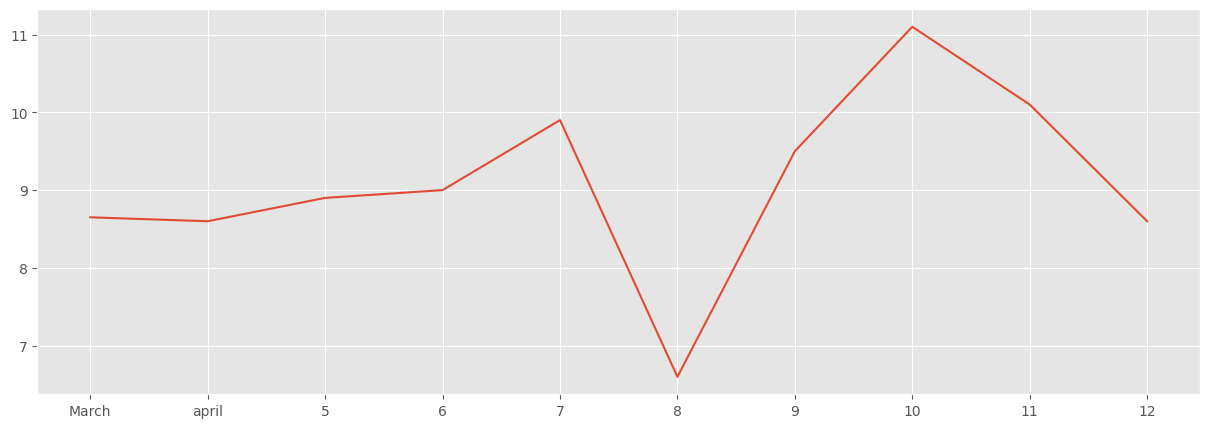

In [ ]:
plt.figure(figsize = (15,5))

plt.plot(["March","april",5,6,7,8,9,10,11,12],group_2004_month.median()["C6H6(GT)"])

plt.show()

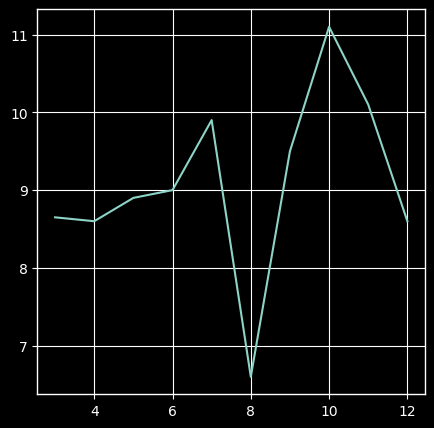

In [ ]:
#  Create a line plot for the monthly median concentration of C6H6 in 2004.
plt.figure(figsize=(5,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["C6H6(GT)"])
plt.show()

You can add the following features to the above plot:

1. `plt.style.use()`:  A style to make the plot look more attractive using the `plt.style.use()` function. E.g., we can create the above plot in the `ggplot` style or if you like to work on a Colab notebook in the dark mode, then use the `dark_background` style.

2. `plt.title()`: A title of the plot using the `plt.title()` function.

3. `plt.xlabel()` & `plt.ylabel()`:  The labels for the coordinate axes using the `plt.xlabel()` & `plt.ylabel()` functions.

4. `plt.grid()`: A grid using the `plt.grid()` function by passing `True` as an input to the function.


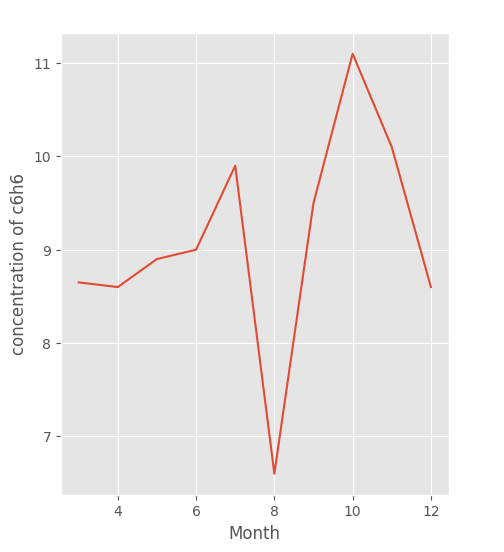

In [ ]:
#  Add the style and a title in the above plot. Also, label the coordinate axes and add a grid.
plt.style.use("ggplot")
plt.figure(figsize=(5,6))
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()["C6H6(GT)"])
#Add customisation

plt.title("monthly median concentration of C6H6 in 2004")
plt.xlabel("Month")
plt.ylabel("concentration of c6h6")
plt.show()





**NOTE:**

After setting a style for a matplotlib plot, all subsequent plots will use this style by default. To revert to the original style, you must remove the style-setting code and rerun all plot-related code. For a list of available matplotlib styles, you can click on the link below and select your preferred style:


[The `matplotlib` Style Sheet Reference](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)











To modify the color and line style in a line plot, you can add a third argument to the plt.plot() function. For instance, using 'g-o' will set the line color to green ('g') and add filled circles at the data points ('-o').

**Note:** Both '-o' and 'o-' will produce the same result.

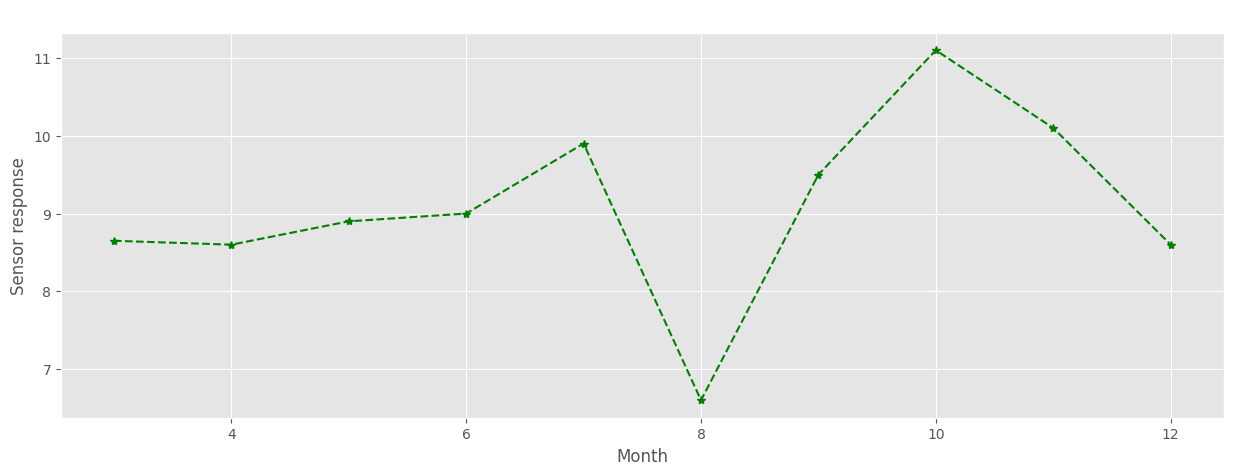

In [ ]:
# In the above plot, pass 'g-o' as the third parameter.
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()["C6H6(GT)"],"green",marker = "*",linestyle ="--")
plt.title("Monthly Median CO Concentration In 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.grid(True)
plt.show()

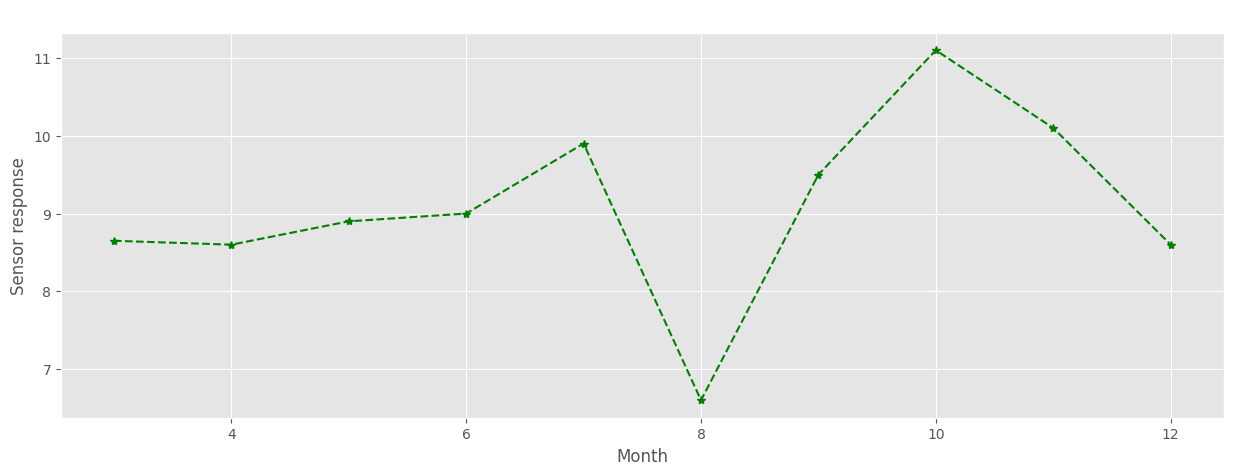

In [ ]:
# In the above plot, pass 'g-o' as the third parameter.
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()["C6H6(GT)"],"g--*")
plt.title("Monthly Median CO Concentration In 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.grid(True)
plt.show()

In [ ]:
help(plt.xlabel)

In [ ]:
import numpy as np
q = np.linspace(0, 10, 3 )

q_y = np.sin(q)
print(q_y)
q

[ 0.         -0.95892427 -0.54402111]


array([ 0.,  5., 10.])

In [ ]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

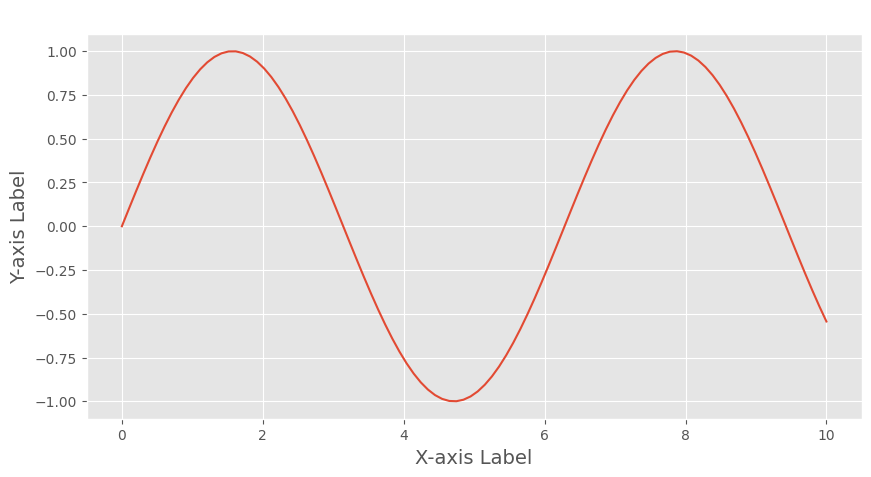

In [ ]:
#Example: sine curve
import numpy as np

# Create sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y)

# Set the x-axis label with a specific font size
plt.xlabel('X-axis Label', fontsize=14)  # Change '14' to your desired font size

# Set the y-axis label with a specific font size
plt.ylabel('Y-axis Label', fontsize=14)  # Change '14' to your desired font size

# Set the title with a specific font size
plt.title('Sample Plot', fontsize=16)  # Change '16' to your desired font size

# Show the plot
plt.show()

click on the link provided below for more color codes.

[The `matplotlib` Colours](https://matplotlib.org/3.2.1/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)



The x-axis displays the month values as numbers. To replace these numeric values with the actual month names, you can use the `plt.xticks()` function. Here’s how you do it:

1. Create a list containing the month names that will replace the numeric values on the `x-axis`.

2. Use the `xticks()` function and provide two main arguments:

- `ticks`, which should be the original `x-axis` indices.

- `labels`, which should be the new month names that will replace the original `x-axis` values.

- Additionally, include a `rotation` parameter to tilt the `x-axis` labels by `45` degrees for better readability.



In [ ]:
c=air_2004_df["DateTime"].dt.month_name()
set(c)

In [ ]:
air_2004_df["DateTime"].dt.month_name().unique()

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'], dtype=object)

In [ ]:
# Extracting unique month names for the year 2004.
months_2004 = air_2004_df["DateTime"].dt.month_name().unique()
months_2004

array(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'], dtype=object)

In [ ]:
months_2005 = air_2005_df["DateTime"].dt.month_name().unique()
months_2005

array(['January', 'February', 'March', 'April'], dtype=object)

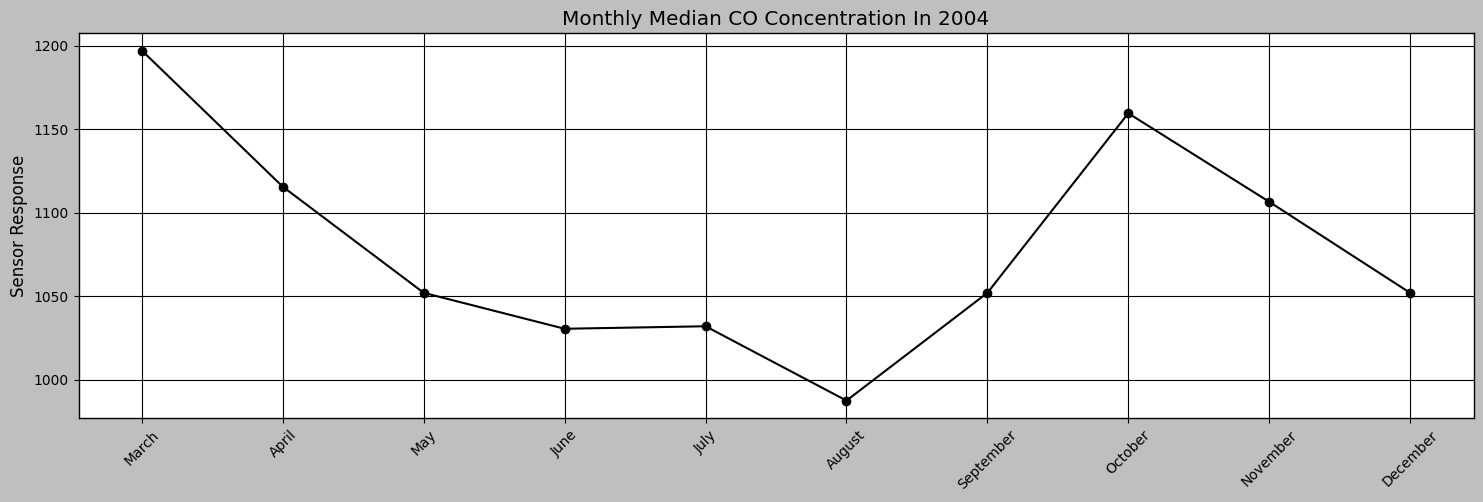

In [ ]:
#  In the above plot, replace the numeric values in the 'x-axis' with the actual month names.
# Create a list of actual month names.
plt.style.use('grayscale')
plt.figure(figsize=(18, 5))
plt.title('Monthly Median CO Concentration In 2004')
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], '-o')
plt.ylabel('Sensor Response')
#write code for xticks()here

plt.xticks(group_2004_month.median()['Month'],months_2004,rotation= 45)


plt.grid(True)
plt.show()

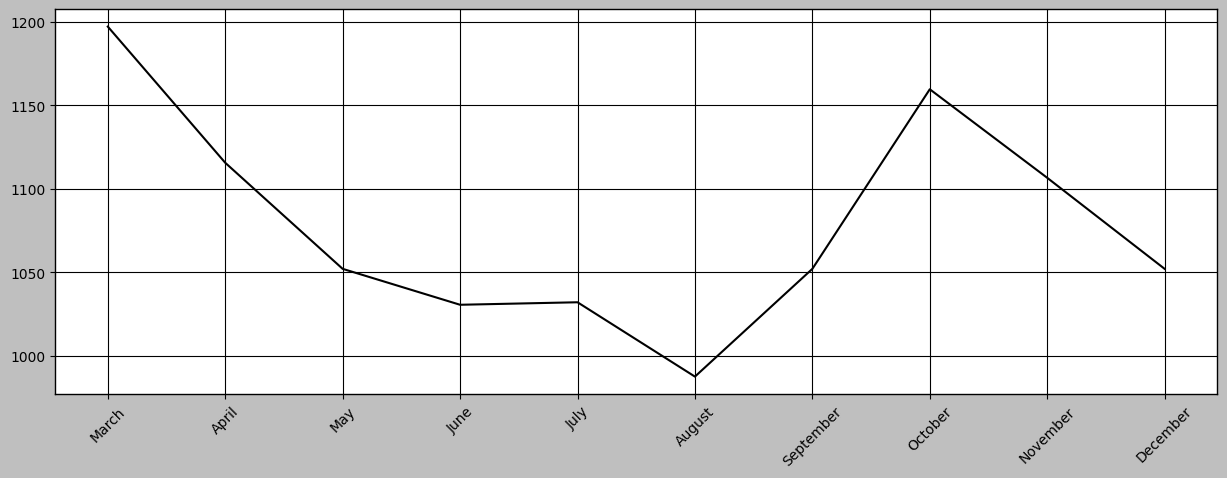

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(pd.Series(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December']), group_2004_month.median()['PT08.S1(CO)'])
plt.xticks(rotation=45)
plt.show()

### Activity 2: `unique()` Function in Pandas

The `unique()` function in Pandas is used to find the unique values of a column in a DataFrame. This is especially useful for understanding the diversity of data in a particular column, such as finding all the distinct categories or types in your data.



In [ ]:
# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Eve', 'Charlie', 'Eve'],
    'Age': [25, 30, 35, 25, 30, 40, 35, 40],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'Chicago', 'New York', 'Chicago']
}

df = pd.DataFrame(data)
# Print the DataFrame
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,New York
3,Alice,25,Chicago
4,Bob,30,Los Angeles
5,Eve,40,Chicago
6,Charlie,35,New York
7,Eve,40,Chicago


In [ ]:
# Find unique values in the 'Name' column
uniq_names = df["Name"].unique()
uniq_names
# Find unique values in the 'City' column



array(['Alice', 'Bob', 'Charlie', 'Eve'], dtype=object)

In [ ]:
#example
# Create a sample DataFrame
data = {
    'StudentID': [101, 102, 103, 104, 105, 101, 102, 106],
    'Subject': ['Math', 'Science', 'Math', 'English', 'Science', 'Math', 'Science', 'History'],
    'Grade': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Print the DataFrame
df

# Find unique values in the 'StudentID' column
unique_student_ids = df['StudentID'].unique()
print("\nUnique Student IDs:")
print(unique_student_ids)

# Find unique values in the 'Subject' column
unique_subjects = df['Subject'].unique()
print("\nUnique Subjects:")
print(unique_subjects)

# Find unique values in the 'Grade' column
unique_grades = df['Grade'].unique()
print("\nUnique Grades:")
print(unique_grades)


Unique Student IDs:
[101 102 103 104 105 106]

Unique Subjects:
['Math' 'Science' 'English' 'History']

Unique Grades:
['A' 'B' 'C']


### Activity 3: Multiple Plots in a Single Graph Using Matplotlib


Creating multiple plots in a single graph can help in comparing different datasets or showing various aspects of the same data. Matplotlib provides several ways to do this, such as using the plot function multiple times, using subplots, or using different plotting functions in the same figure.

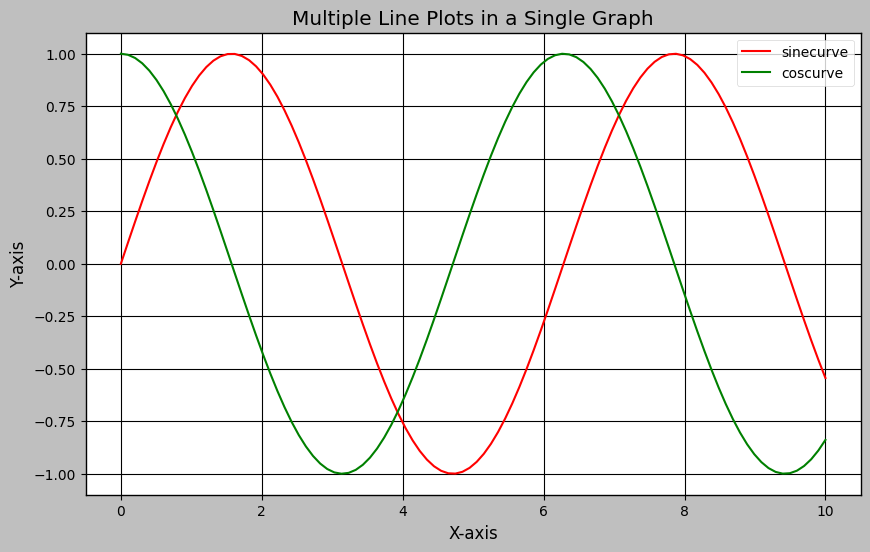

In [ ]:
# Create data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first line
plt.plot(x, y1,label="sinecurve",color = "red")

# Plot the second line
plt.plot(x, y2,label="coscurve",color = "green")

# Add title and labels
plt.title('Multiple Line Plots in a Single Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend() # for seeing labels on plot

# Show the plot
plt.show()

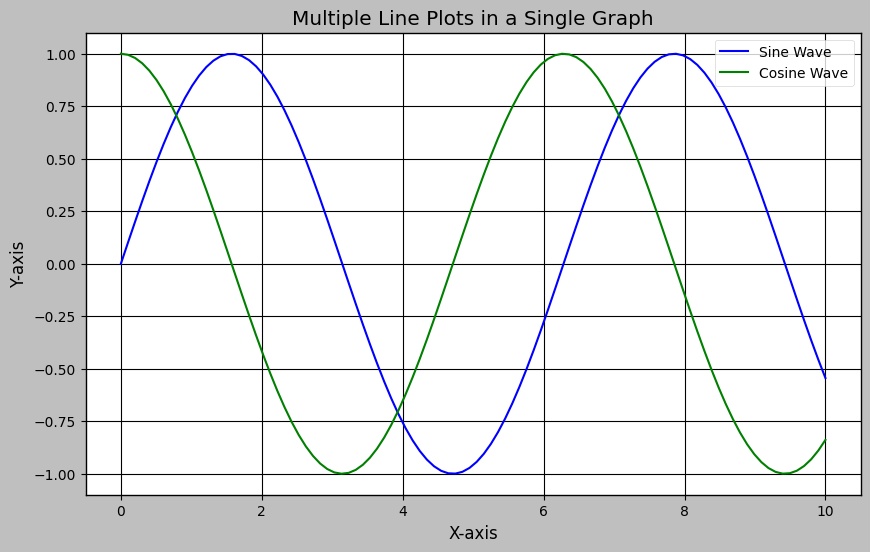

In [ ]:
# Create data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first line
plt.plot(x, y1, label='Sine Wave',color="blue" )

# Plot the second line
plt.plot(x, y2, label='Cosine Wave',color ="green")

# Add title and labels
plt.title('Multiple Line Plots in a Single Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()

# Show the plot
plt.show()

Let's also generate a plot for the monthly median Pollutant concentration in 2005 to compare it with the data from 2004. To achieve this, simply call the `plt.plot()` function again right after the plot for 2004.

To perform this comparison accurately, you'll need to create DataFrames that include only the months present in both 2004 and 2005. Therefore, let's first identify the common months between these two years.

In [ ]:
# In the dataset, find out for which months the records are present for both 2004 and 2005 years.
common_months = []
common_name = []
for month in air_2005_df['Month'].unique():
  if month in air_2004_df['Month'].unique():
    common_months.append(month)

print(common_months)
for i in list(months_2004):
  if i in list(months_2005):
    common_name.append(i)
print(common_name)

[3, 4]
['March', 'April']


In [ ]:
air_df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10


So only for March and April months, we have records for both the years 2004 and 2005.

Now, let's create a DataFrame containing records only for the March and April months for the year 2004.

In [ ]:
group_2004_month.median().loc[[0,1]]

In [ ]:
# Create a DataFrame for the year 2004 that contains records for only March and April.
common_2004=group_2004_month.median().loc[[0,1]]
common_2004

,Month,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
0,3,2004-03-21 08:30:00,1197.0,8.65,926.0,966.5,1543.0,992.5,14.05,52.2,0.79205,2004.0,21.0
1,4,2004-04-15 23:30:00,1115.5,8.60,923.0,882.0,1555.0,939.5,16.30,50.1,0.90875,2004.0,15.5


In [ ]:
# Create a DataFrame for the year 2005 that contains records for only March and April.
common_2005=group_2005_month.median().loc[[2,3]]
common_2005

,Month,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
2,3,2005-03-16 11:30:00,1126.0,6.6,841.0,684.5,1217.0,1039.5,13.5,51.7,0.7834,2005.0,16.0
3,4,2005-04-02 19:00:00,925.0,3.3,669.0,906.0,936.0,556.0,15.1,35.6,0.5977,2005.0,2.0


In [ ]:
common_2004.columns[1:-2]

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

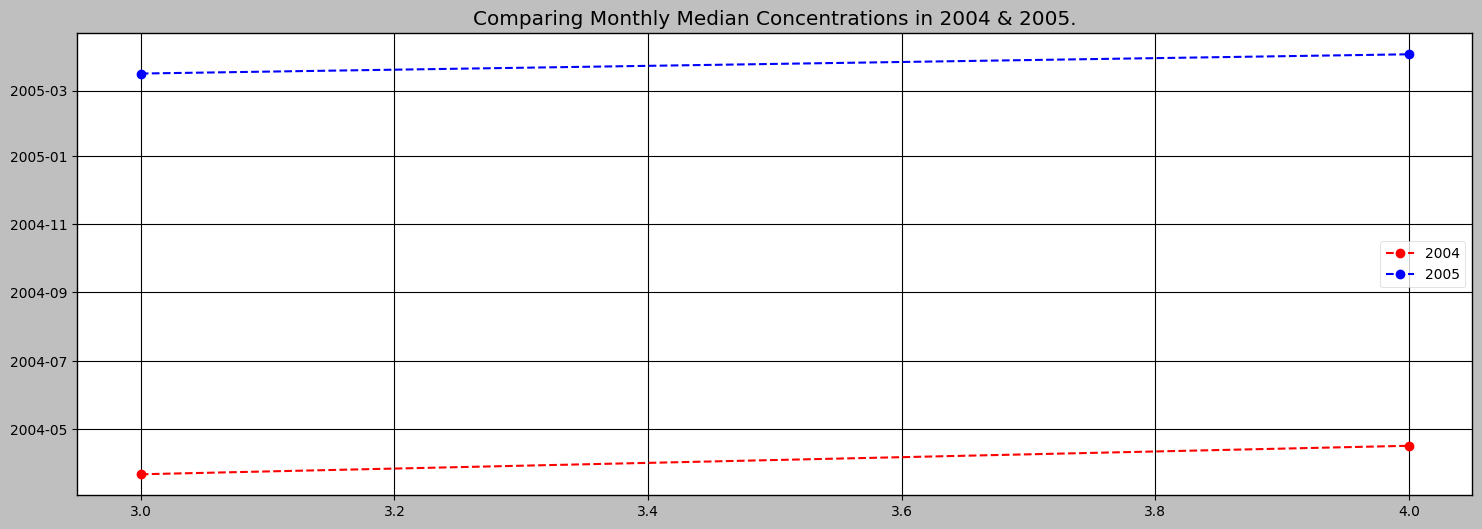

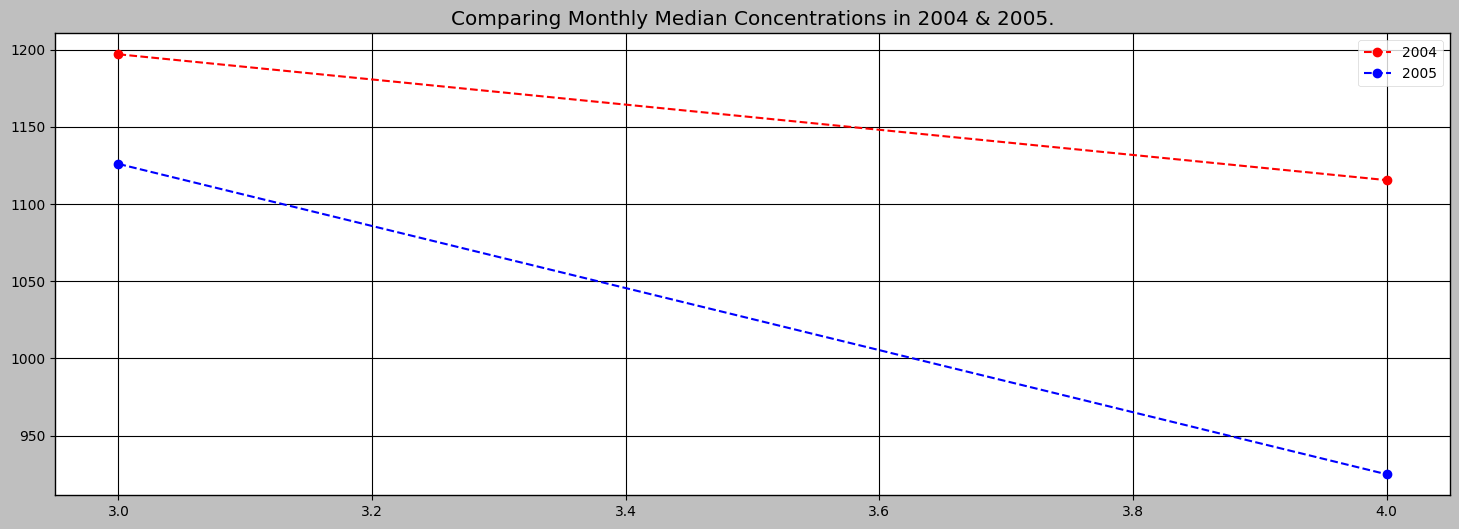

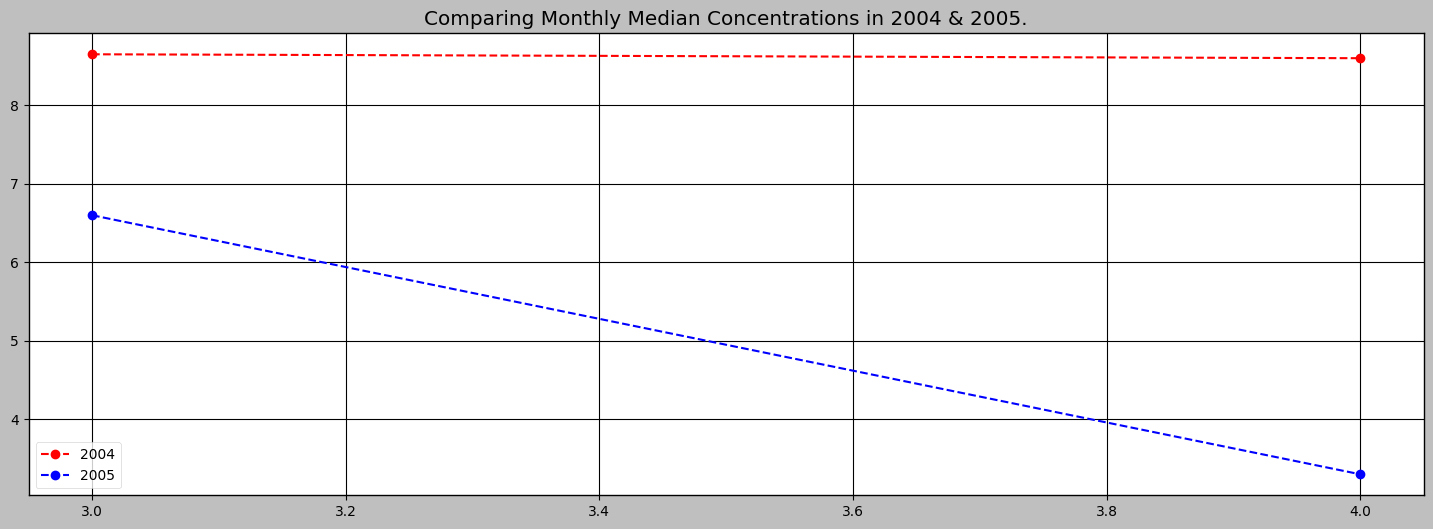

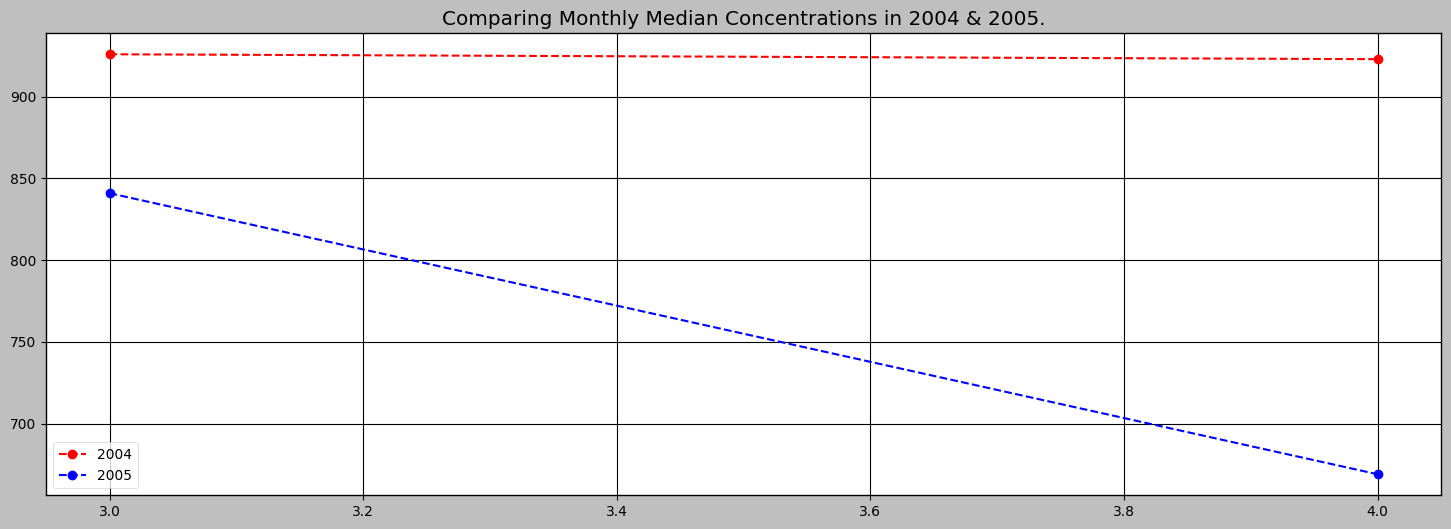

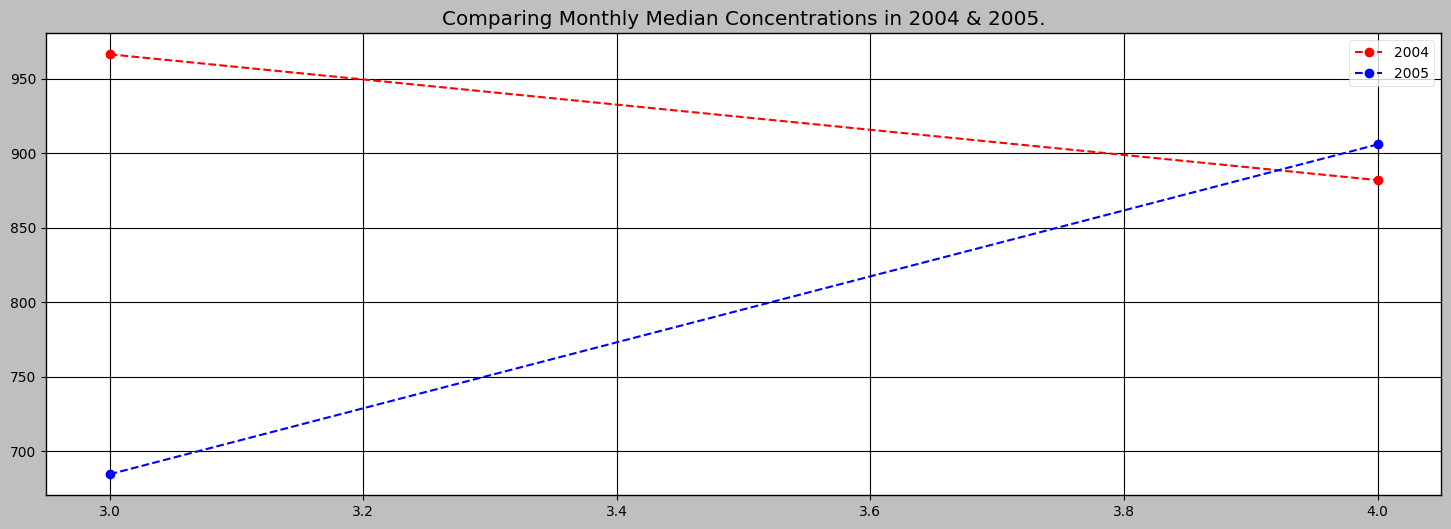

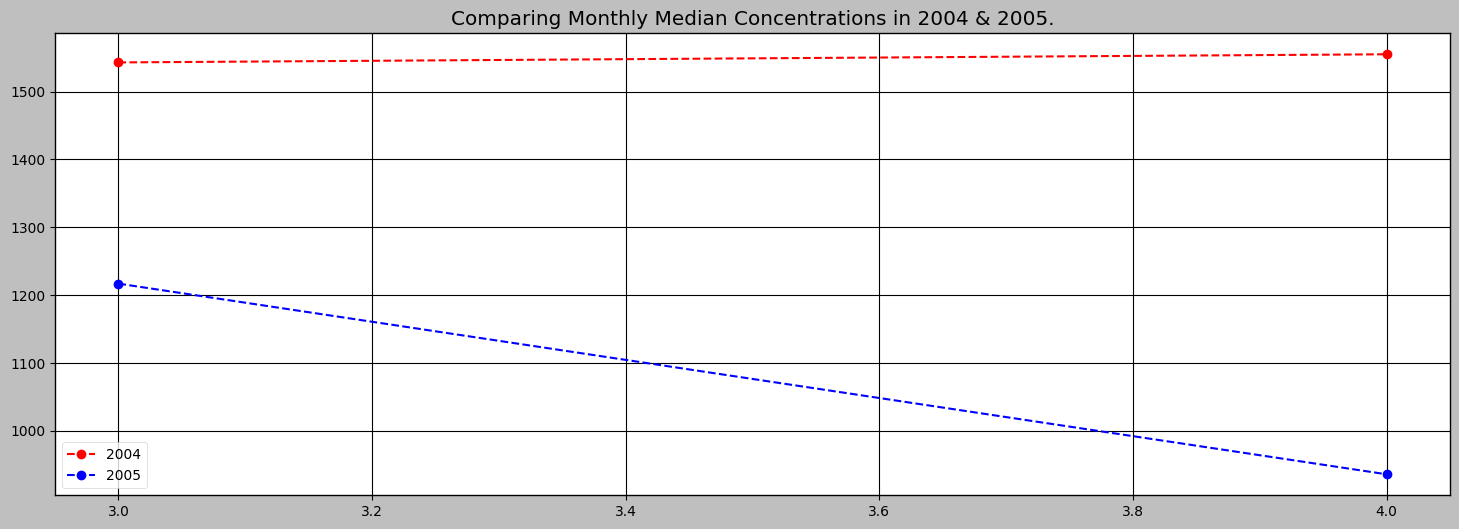

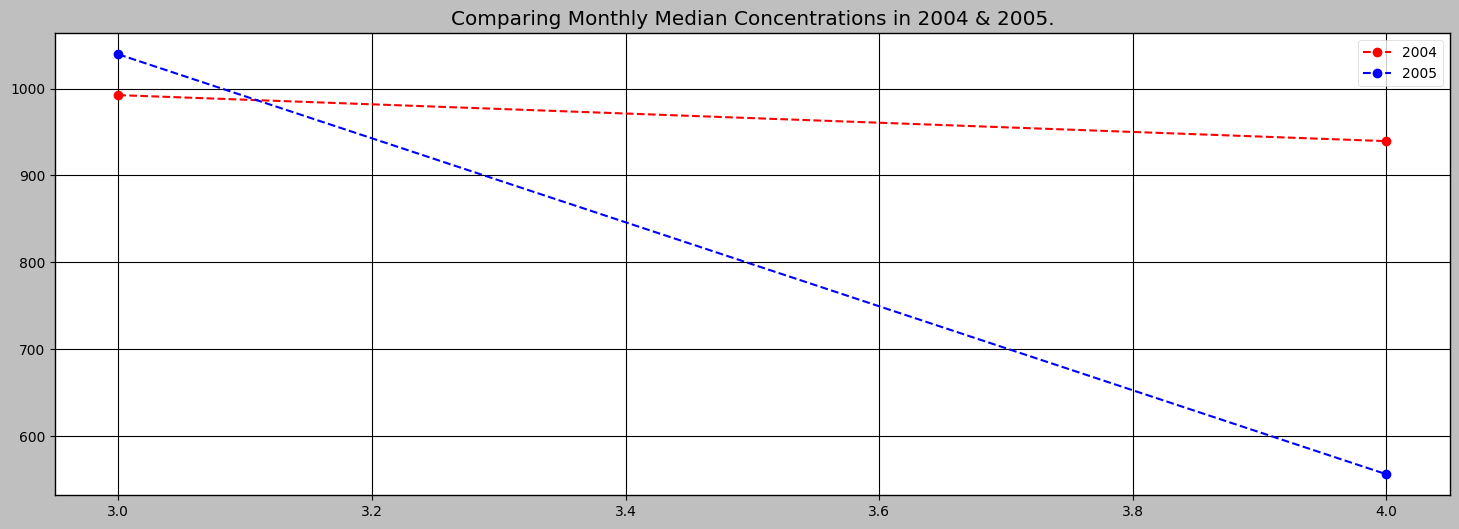

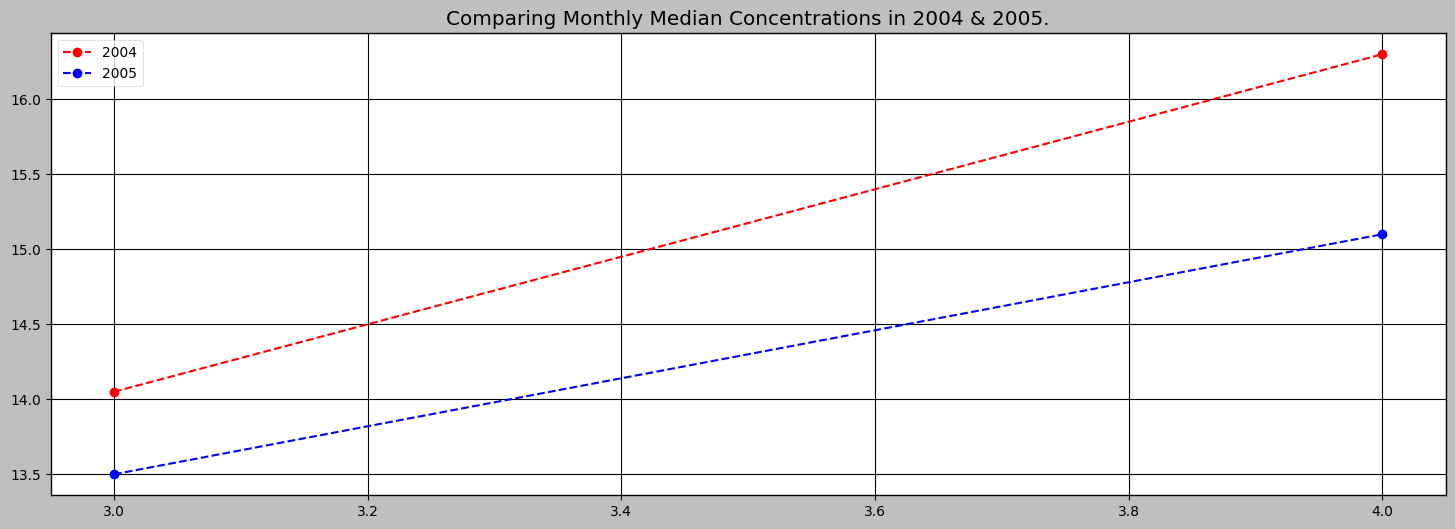

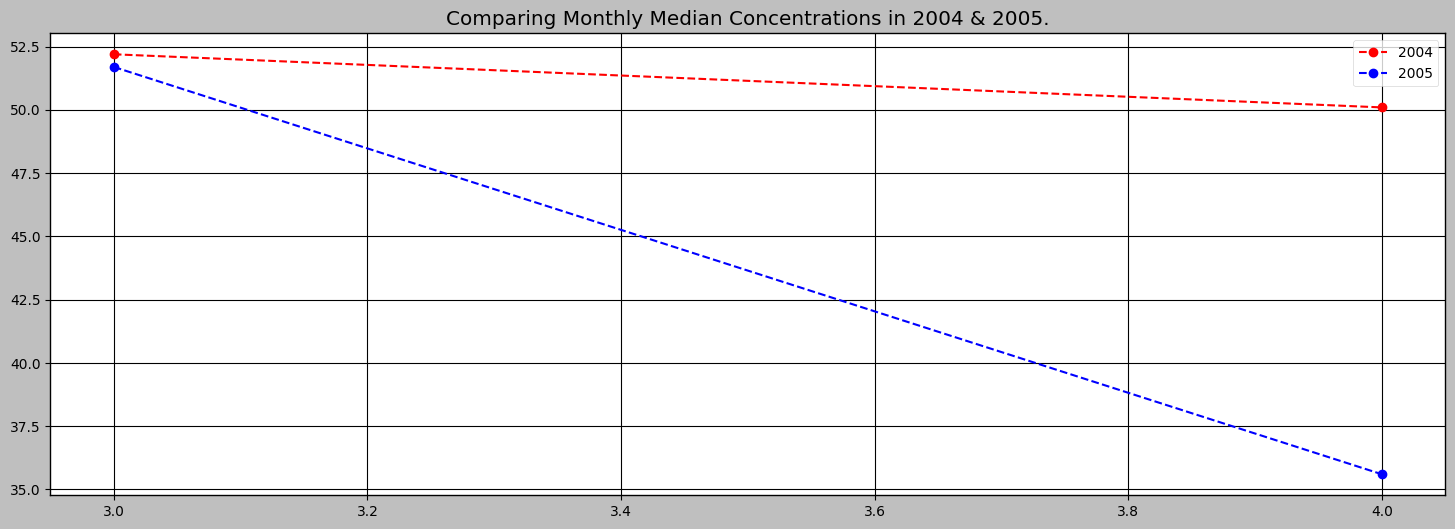

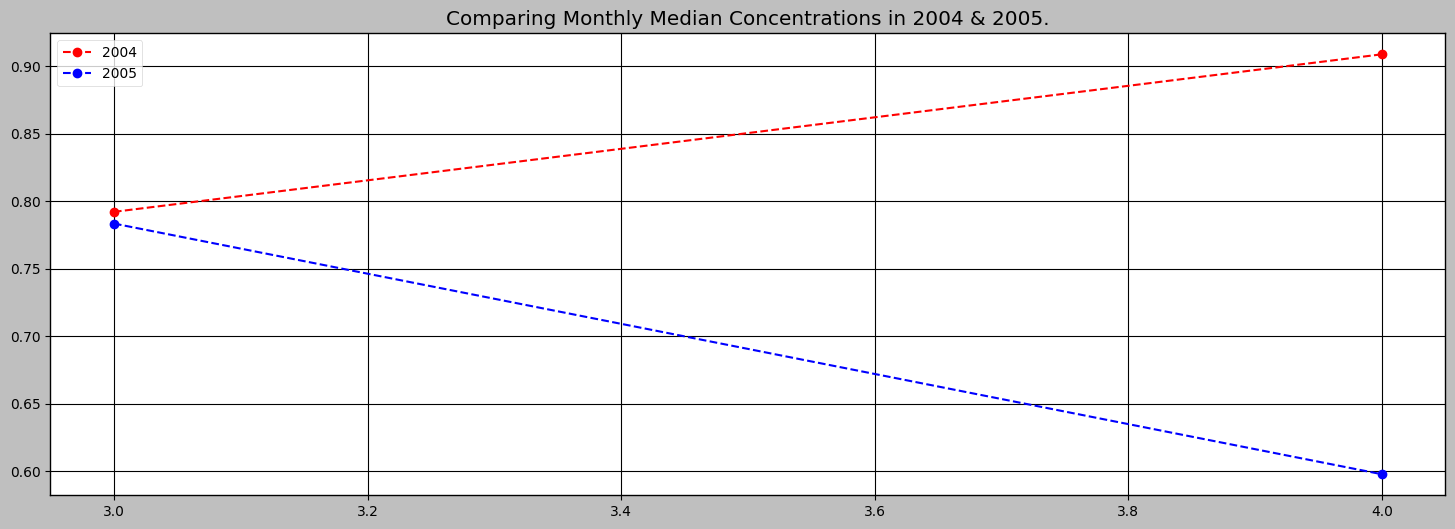

In [ ]:
#Create a line plot for the monthly median concentrations for both the years. Use the 'seaborn-dark' style this time.
for i in common_2004.columns[1:-2]:

    plt.figure(figsize=(18, 6))
    plt.title("Comparing Monthly Median Concentrations in 2004 & 2005.")
    plt.plot(common_months, common_2004[i], 'r--o', label = 2004)
    plt.plot(common_months, common_2005[i], 'b--o', label = 2005)
    plt.legend()
    plt.show()




- The values to the fourth parameter `label`, i.e., 2004 and 2005 are passed to label the plots to distinguish between them or distinctly identify them. In other words, they are legends to identify distinct plots.

- The `legend()` function displays the labels of the plots on the graph itself to distinguish between the plots.



---

### Activity 4: Time-Series Line Plots

Now, let's create a time series plot using the `plt.plot()` function to visualise the daily average concentration of air pollutants, temperature, relative humidity and absolute humidity.

Let's create a user-defined function which creates a line plot and takes care of plot attributes as well. The function should take the following inputs:

1. Style of a `matplotlib` plot.

2. Width of the plot.

3. Height of the plot.

4. The Pandas series whose values are to be plotted on the `x-axis`.

5. The Pandas series whose values are to be plotted on the `y-axis`.

6. The year value (either 2004 or 2005) for which the plot needs to be created.

7. The colour of the plot.

In [ ]:
# Create a userheight, x_series, y_series, year, colour):
def a(style,width,height,x_series,y_series,year,colour):
  plt.style.use(style)
  plt.figure(figsize=(width, height))
  plt.title(f"\nTime-series Plot for {y_series.name} in {year}")
  plt.plot(x_series, y_series, colour)
  plt.grid(True)
  plt.show()




Now, let's apply this function on the 2004 DataFrame.

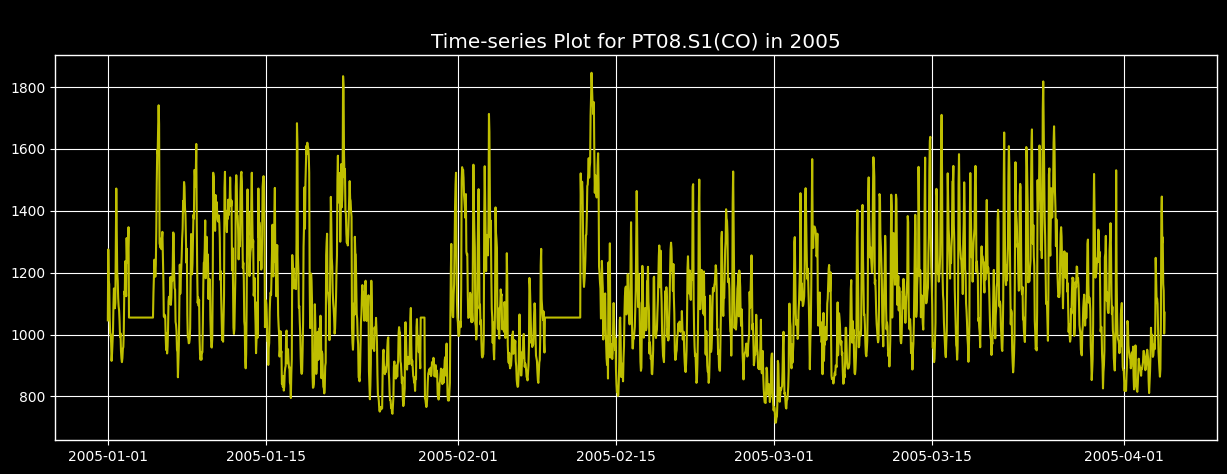

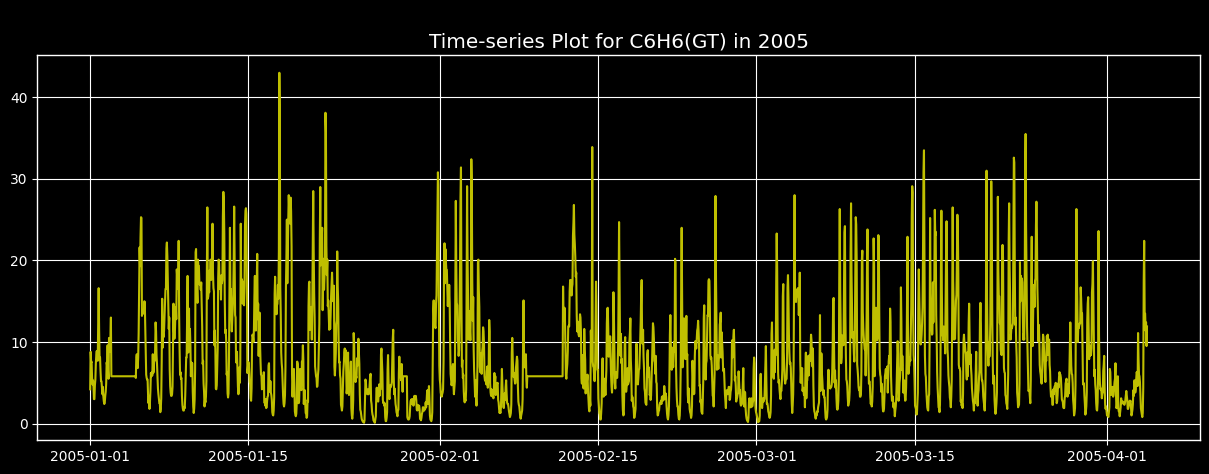

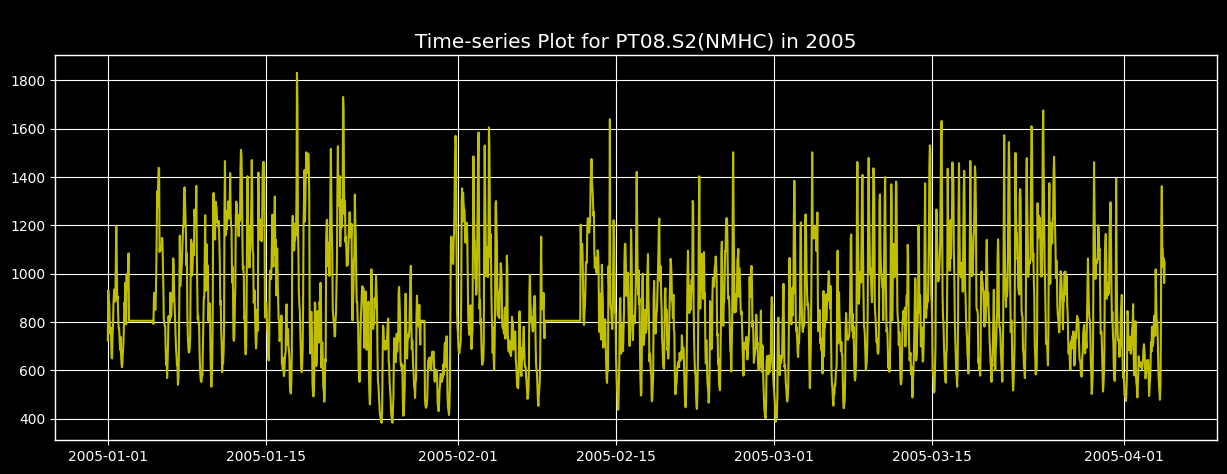

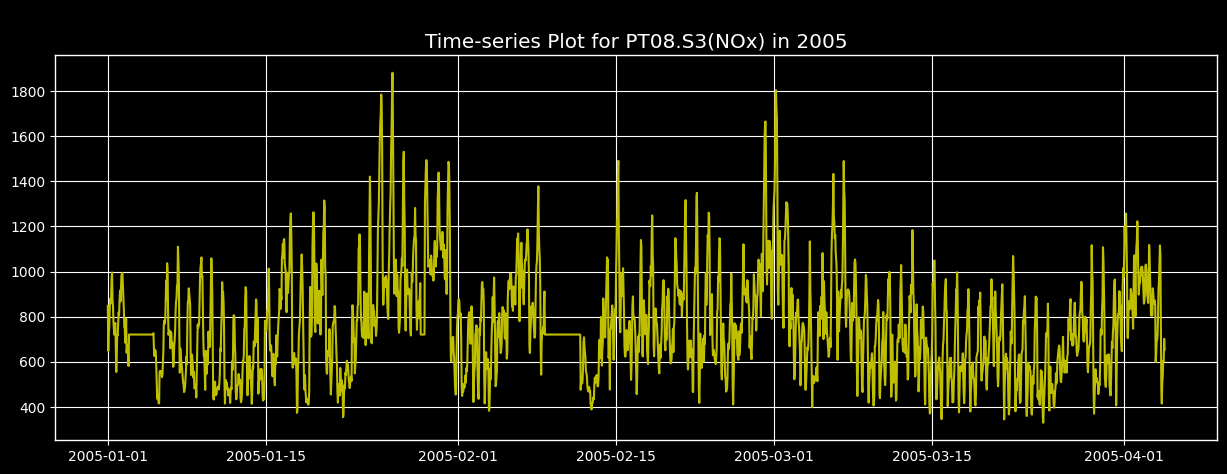

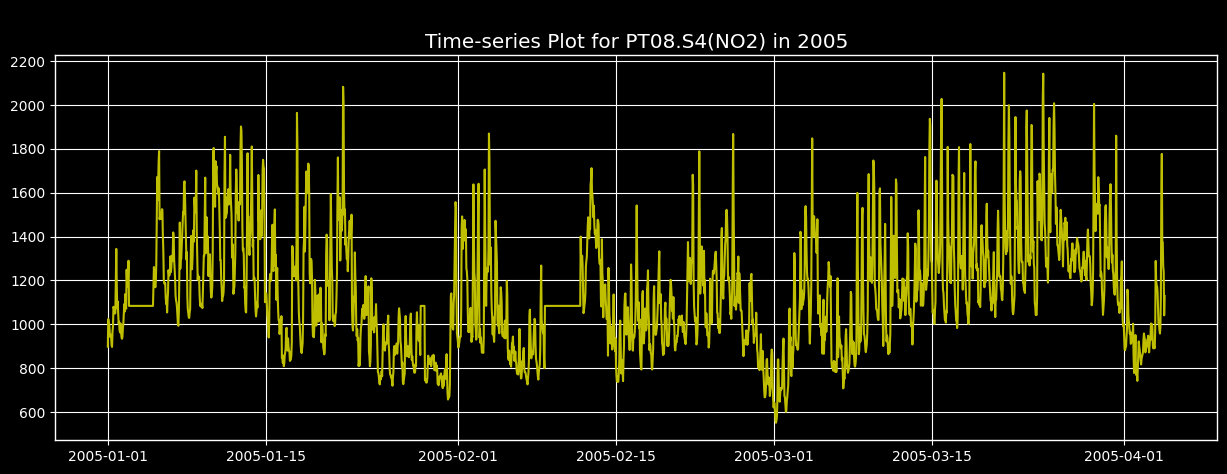

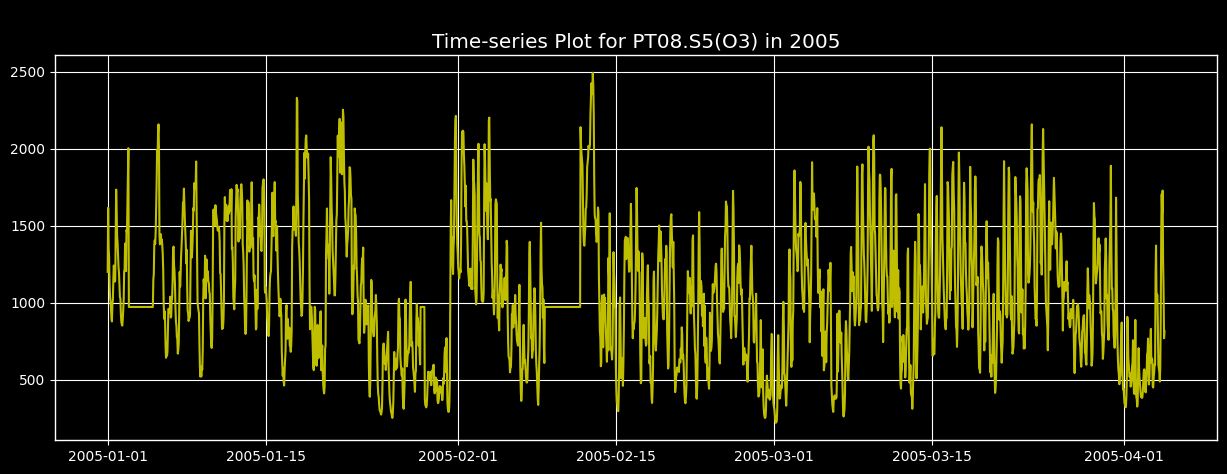

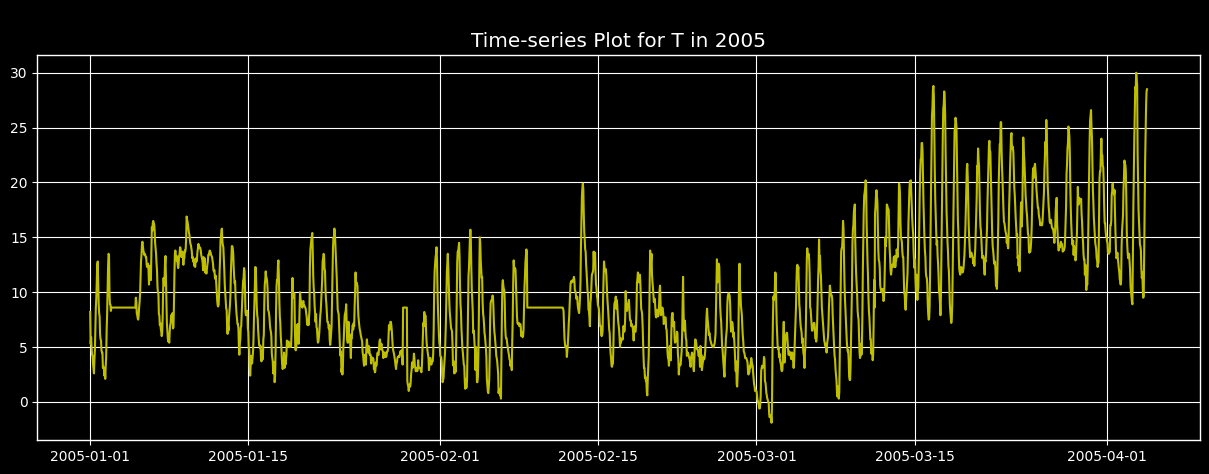

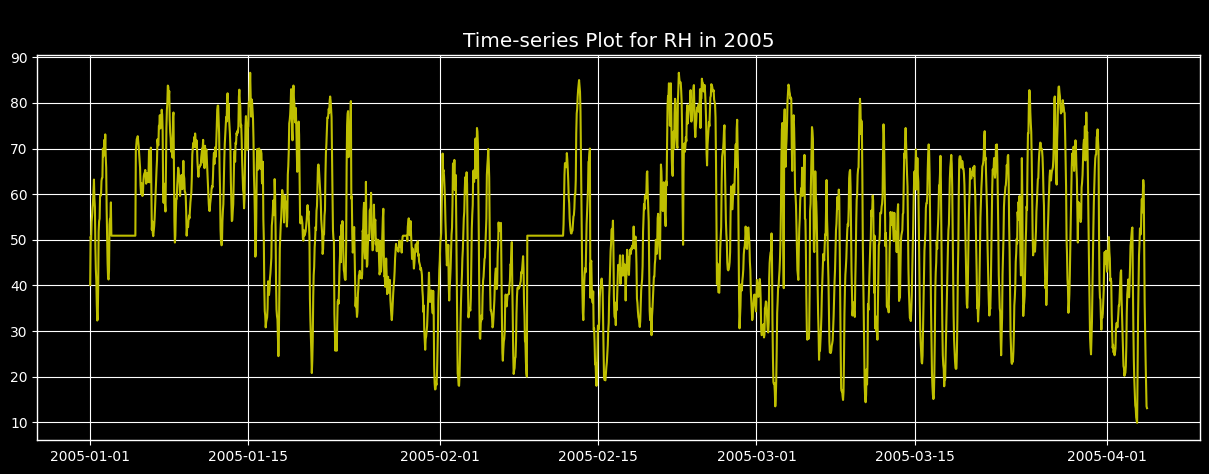

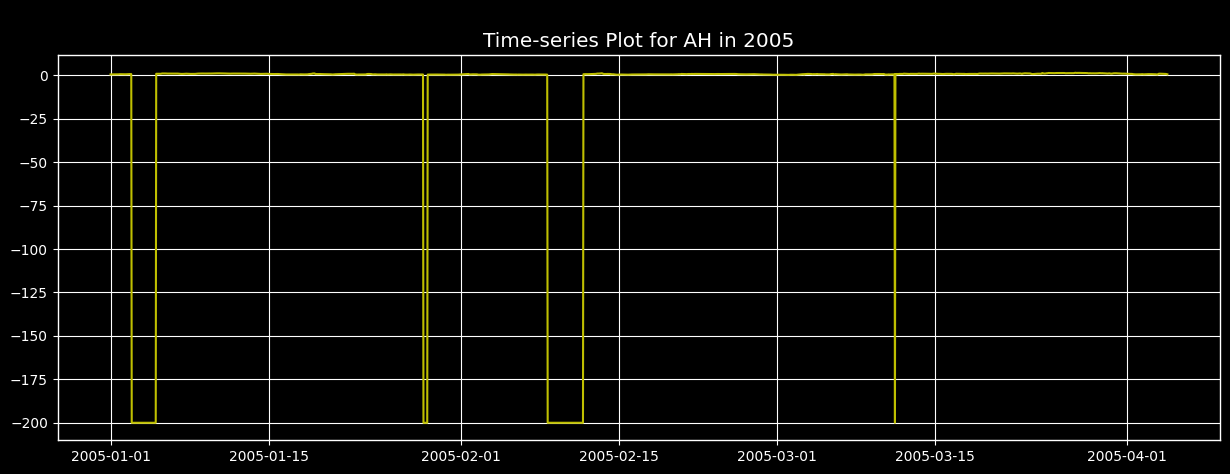

In [ ]:
#  Create a line plot for all the air pollutants concentrations, temperature, relative & absolute humidity for the year 2004.
for i in air_2005_df.columns[1:-3]:
    a("dark_background",15,5,air_2005_df["DateTime"],air_2005_df[i],2005,"y")

---

### Activity 5: Concatenate DataFrames



**The `pd.concat()` Function**

The `pd.concat() `function in pandas is used to concatenate two or more DataFrames. This can be done either along rows (vertical concatenation) or along columns (horizontal concatenation). This function is quite flexible and provides several options to control how the concatenation is performed.

**Syntax:** `pd.concat([df1, df2, df3 ... dfN])`

where `df1, df2, df3 ... dfN` are `N` different DataFrames having the exact same columns.



**Basic Concatenation**

Let's start with a simple example of concatenating two DataFrames along the rows.

In [ ]:

# Creating two sample DataFrames
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'B': ['B4', 'B5', 'B6']
})

# Concatenating the DataFrames
result = pd.concat([df1, df2])

print(result)

    A   B
0  A1  B1
1  A2  B2
2  A3  B3
0  A4  B4
1  A5  B5
2  A6  B6


**Concatenation Along Columns**

You can also concatenate DataFrames along columns by using the axis parameter.

In [ ]:

# Creating two sample DataFrames
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'B': ['B4', 'B5', 'B6']
})

# Concatenating the DataFrames along columns
result = pd.concat([df1, df2], axis=1)

print(result)

In [ ]:
#Example
df1 = pd.DataFrame({
    'X': ['X1', 'X2', 'X3']
})

df2 = pd.DataFrame({
    'Y': ['Y1', 'Y2', 'Y3']
})

result = pd.concat([df1, df2], axis=0)
print(result)

**Ignoring Index**

By default, the original indices are preserved. However, you can ignore the index and create a new one using the ignore_index parameter.

In [ ]:

# Creating two sample DataFrames
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'B': ['B4', 'B5', 'B6']
})

# Concatenating the DataFrames with new index
result = pd.concat([df1, df2], ignore_index=True)

print(result)

In [ ]:
#Example
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
}, index=[0, 1, 2])

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'B': ['B4', 'B5', 'B6']
}, index=[3, 4, 5])

result = pd.concat([df1, df2], ignore_index=True)
print(result)

**Concatenation with Different Columns**

When concatenating DataFrames with different columns, missing values will be filled with NaN.

In [ ]:
# Creating two sample DataFrames with different columns
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'C': ['C4', 'C5', 'C6']
})

# Concatenating the DataFrames
result = pd.concat([df1, df2])

print(result)

**Adding Keys to the DataFrames**

You can use the keys parameter to add a hierarchical index to the concatenated DataFrames.




In [ ]:

# Creating two sample DataFrames
df1 = pd.DataFrame({
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6'],
    'B': ['B4', 'B5', 'B6']
})

# Concatenating the DataFrames with keys
result = pd.concat([df1, df2], keys=['df1', 'df2'])

print(result)

Concatenate air_2004_df,air_2005_df to one dataframe

In [ ]:
# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df=pd.concat([air_2004_df,air_2005_df])
df.head()

In [ ]:
# Find the number of rows and columns in the concatenated DataFrame.
df.shape

### Activity 6: Count plots

Count plots are a type of bar plot used to display the frequency distribution of a categorical variable. They are helpful in visualizing the count of occurrences for each category within a dataset.

Let's dive into some examples to understand how to create and interpret count plots using seaborn in Python.

 **Basic Count Plot**

Suppose we have a DataFrame with a column Category that contains different categories.

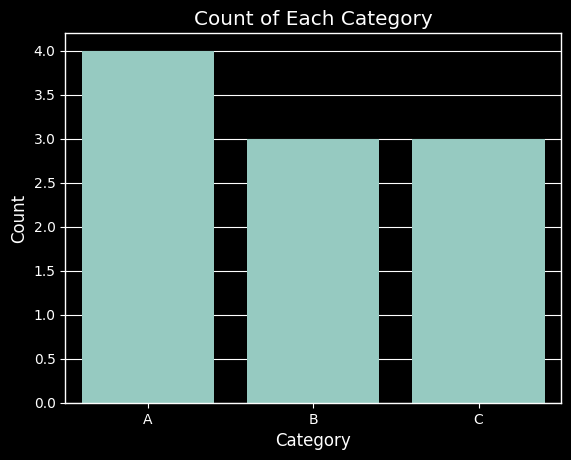

In [ ]:

import seaborn as sns


# Sample DataFrame
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A']
})
data
# Create a count plot
sns.countplot(x='Category', data=data)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Count Plot with Hue**

You can also use the hue parameter to group the counts by another categorical variable. Let's add another column Type to our DataFrame.



In [ ]:
# Sample DataFrame
data1 = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A'],
    'Type': ['X', 'Y', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'Y', 'X']
})
data1


In [ ]:
# Create a count plot with hue
sns.countplot(x='Category', hue='Type', data=data1)
plt.title('Count of Each Category by Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Here, the `hue `parameter differentiates the bars based on the `Type` column, allowing us to see the distribution of `Type` within each `Category`.



 **Horizontal Count Plot**

You can also create horizontal count plots by switching the axes.

In [ ]:
# Sample DataFrame
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A']
})

# Create a horizontal count plot
sns.countplot(y='Category', data=data)
plt.title('Count of Each Category (Horizontal)')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Count Plot with Custom Colors**

You can customize the color of the bars in the count plot.

In [ ]:
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A'],
    'Type': ['X', 'Y', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'Y', 'X']
})
# Create a count plot with custom colors
sns.countplot(x='Category', data=data, palette='viridis',hue="Type")
plt.title('Count of Each Category with Custom Colors')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Activity 7: Pie Charts

Pie charts are a way to visualize data proportions in a circular format, where each segment of the circle (slice) represents a portion of the whole dataset. The size of each slice corresponds to its proportion relative to the entire dataset. Larger slices indicate larger proportions.

**Syntax:** `plt.pie(sizes)`

In this syntax, sizes refers to the values representing the proportions of each slice. These can be raw counts or percentages. The `pie()` function generates a pie chart where each slice's size reflects its proportion of the total.

To enhance the appearance of the pie charts or other plots, you can adjust the **dpi** (dots per inch) setting. This parameter controls the resolution of the plot. Higher `dpi` values result in clearer and more detailed plots.


In [ ]:
# Example data
grades = ['7th Grade', '8th Grade', '9th Grade']
number_of_students = [50, 60, 70]

In [ ]:
#Example
plt.style.use("ggplot")
plt.pie(number_of_students)
plt.title('Number of Students by Grade')
plt.show()

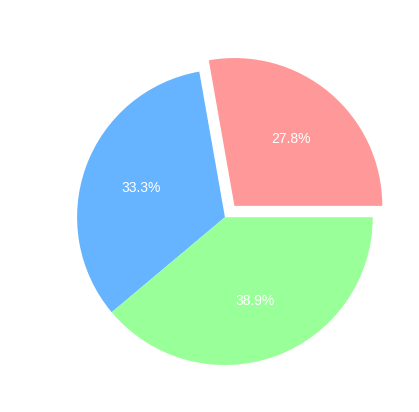

In [ ]:
#example
colors = ['#ff9999','#66b3ff','#99ff99']  # Custom colors for each slice
explode = (0.1, 0, 0)  # Explode the first slice (7th Grade)

plt.pie(number_of_students, labels=grades, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Number of Students by Grade')
plt.show()

In [ ]:
#example
colors = ['green','blue','red']  # Custom colors for each slice
explode = (0.1, 0, 0)  # Explode the first slice (7th Grade)
plt.pie(number_of_students, labels=grades, autopct='%1.1f%%', colors=colors, explode=explode,textprops = {'color': 'black'} )
plt.title('Number of Students by Grade')
plt.show()

we can visualise the percentages of observations recorded in 2004 and 2005 using a pie chart.

To create a pie chart first you need to define the slice proportions through a list, a tuple, a series or an array and pass it as an input to the `pie()` function.

In [ ]:
df_full = pd.concat([air_2004_df, air_2005_df])
df_full

In [ ]:
x1=df_full["Year"].value_counts() / df_full.shape[0]
x1

In [ ]:
x1.index

In [ ]:
#Create a pie chart to display the percentage of data collected in 2004 and 2005.
plt.figure(dpi=100)
plt.pie(x1)
plt.show()

In [ ]:
#Display the percentage of data collected in 2004 and 2005
#label_1=["2004","2005"]
plt.figure(dpi=100)
plt.pie(x1,labels = ["2004","2005"])
plt.show()


In [ ]:
# Label the slices of a pie chart with their corresponding year values. Also, set 'black' as the outline colour of the chart.
#wedgeprops={'edgecolor':'red'}
plt.figure(dpi=100)
plt.pie(x1,labels=x1.index ,wedgeprops={'edgecolor': 'black'})
plt.show()


You can add the percentage values in the corresponding slices by passing `autopct='%1.1f%%'` as another parameter to the `pie()` function. If you change the numeral after the dot (or period) to `2`, then the pie chart will display the percentage value upto 2 places after the decimal.

In [ ]:
#Add percentage values to the corresponding slices.
#autopct1.='%1.1f%%'
plt.figure(dpi=100)
plt.pie(x1,labels=x1.index,wedgeprops={'edgecolor':'black'},autopct='%1.2f%%')
plt.show()


You can separate a slice (or more slices) from a pie by passing another parameter called `explode` to the `pie()` function. The input to the `explode` parameter should be a list, tuple etc. containing the amount by which a slice should move away from the centre of a pie.



In [ ]:
# Separate the slice for the year 2005.
plt.figure(dpi=100)
plt.pie(x1,labels=x1.index,wedgeprops={'edgecolor':'purple'},autopct='%1.3f%%',explode=[0,0.90])
plt.show()

You can also provide the 3D effect to the pie by adding the `shadow=True` parameter to the `pie()` function.

In [ ]:
# Add 3D effect to the pie.
plt.figure(dpi=100)
plt.pie(x1,labels=x1.index,wedgeprops={'edgecolor':'purple'},autopct='%1.3f%%',explode=[0,0.20],shadow=True)
plt.show()


**Note:** The sum of all the percentages in a pie chart will be and should be 100.

**When not to create a pie chart?**

A pie chart has its limited use. It should be used to plot the proportion of a few categories. If there are more category proportions to be visualised then don't use the pie chart.

### Activity 8: Pandas Dataframe to CSV

You have used a CSV file to explore data, clean it and analyse it for the respective problem statements. Now we will see how you can create a CSV using Pandas DataFrame. Later you use the same CSV file to do your work either in Google Sheets or Microsoft Excel or in some other spreadsheet processing software.


Creating a CSV File with Custom Data:

We will create a CSV file with four columns: `"original", "doubled", "tripled", and "quadrupled"`. Each column will contain numbers and their transformations:

- The `"original"` column will have the numbers from 1 to 100.
- The `"doubled"` column will contain each number from `"original" `doubled.
- The `"tripled"` column will contain each number from `"original"` tripled.
- The `"quadrupled" `column will contain each number from `"original"` quadrupled.

In [ ]:
a = [i**3 for i in range(1,101)]
a

In [ ]:
# Create a dictionary with the required columns and their values
data_dict = {
    "original": [i for i in range(1, 101)],               # List of numbers from 1 to 100
    "doubled": [i * 2 for i in range(1, 101)],            # List of numbers doubled
    "tripled": [i * 3 for i in range(1, 101)],            # List of numbers tripled
    "quadrupled": [i * 4 for i in range(1, 101)]          # List of numbers quadrupled
}

In [ ]:
data_dict

---

#### Activity 8.1: The `from_dict()` Function

Now, let's convert the above dictionary into a Pandas DataFrame using the `from_dict()` function. To apply this function, you have to use the following syntax.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

In [ ]:
# Create a Pandas DataFrame using the 'new_dict' dictionary by applying the 'from_dict()' function.
import pandas as pd
new_df = pd.DataFrame.from_dict(data_dict)
new_df

In [ ]:
# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data_dict)
data_df

---

#### Activity 8.2: The `orient` Parameter

In the above DataFrame created from a Python dictionary, you can label  row indices. Consequently, the values `0` to `99` will become columns. This can be done by passing `'index'` as the value to the `orient` parameter inside the `from_dict()` function. Here's the syntax.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary, orient='index')`

In [ ]:
# Student Action: Create another Pandas DataFrom using the 'new_dict' having "linear", "squared", "cubed" and "power_of_two" as row indices.
new_dftwo = pd.DataFrame.from_dict(data_dict, orient="index")
new_dftwo

---